In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Cargar el dataset
df = pd.read_csv("../data/raw/Pokemon.csv")
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Nos interesan solo los tipos
df_types = df[['Type 1', 'Type 2']]
df_types.head()


,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Fire,NaN


In [4]:
# One-Hot Encoding
encoder = OneHotEncoder()

# Combinamos Type 1 y Type 2
types_combined = df_types.fillna('None')  # Rellenar NAs en Type 2
encoded_types = encoder.fit_transform(types_combined)

# Convertir a DataFrame
types_df = pd.DataFrame(encoded_types.toarray(), columns=encoder.get_feature_names_out(['Type 1', 'Type 2']))
types_df.head()


,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


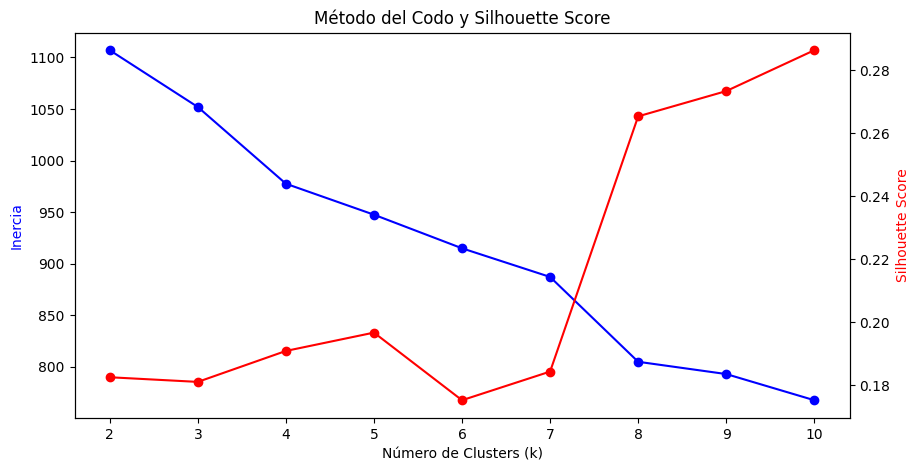

In [6]:
inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(types_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(types_df, labels))

# Graficar Método del Codo + Silhouette
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(k_range, inertia, 'bo-', label='Inercia')
ax2.plot(k_range, silhouette, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')
ax1.set_xticks(k_range)
plt.title('Método del Codo y Silhouette Score')
plt.show()


In [8]:
k_optimo = 5  # <-- este número lo elegiremos con base en el gráfico
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['cluster'] = kmeans.fit_predict(types_df)


In [9]:
# Número de Pokémon por cluster
df['cluster'].value_counts().sort_index()


cluster
0    290
1    109
2     57
3    310
4     34
Name: count, dtype: int64

In [10]:
# Visualizar ejemplos de Pokémon en cada cluster
for i in range(k_optimo):
    print(f"\nCluster {i}")
    display(df[df['cluster'] == i][['Name', 'Type 1', 'Type 2']].head(5))



Cluster 0


,Name,Type 1,Type 2
6,Charizard,Fire,Flying
7,CharizardMega Charizard X,Fire,Dragon
8,CharizardMega Charizard Y,Fire,Flying
20,Pidgey,Normal,Flying
21,Pidgeotto,Normal,Flying



Cluster 1


,Name,Type 1,Type 2
9,Squirtle,Water,NaN
10,Wartortle,Water,NaN
11,Blastoise,Water,NaN
12,BlastoiseMega Blastoise,Water,NaN
59,Psyduck,Water,NaN



Cluster 2


,Name,Type 1,Type 2
13,Caterpie,Bug,NaN
14,Metapod,Bug,NaN
15,Butterfree,Bug,Flying
51,Paras,Bug,Grass
52,Parasect,Bug,Grass



Cluster 3


,Name,Type 1,Type 2
4,Charmander,Fire,NaN
5,Charmeleon,Fire,NaN
24,Rattata,Normal,NaN
25,Raticate,Normal,NaN
28,Ekans,Poison,NaN



Cluster 4


,Name,Type 1,Type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
16,Weedle,Bug,Poison


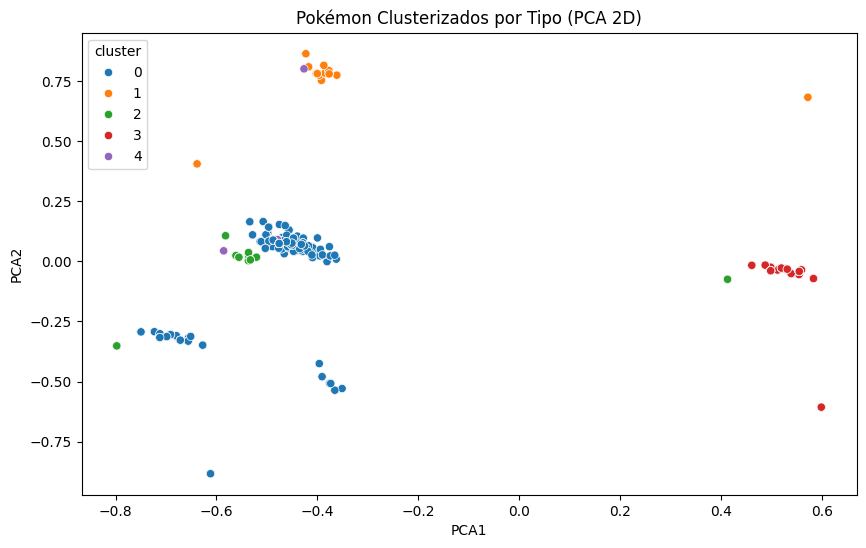

In [11]:
from sklearn.decomposition import PCA

# Reducción de Dimensionalidad para visualizar
pca = PCA(n_components=2)
types_pca = pca.fit_transform(types_df)

df['PCA1'] = types_pca[:, 0]
df['PCA2'] = types_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title('Pokémon Clusterizados por Tipo (PCA 2D)')
plt.show()
